<a href="https://colab.research.google.com/github/rameenhamad/API_Handling/blob/main/3_Visualize_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv(r"/content/drive/MyDrive/Certura_Tasks/Titanic-Dataset.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [112]:
df.shape

(891, 12)

In [113]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Feature Engineering

In [114]:
#as cabin have almost 77 persent null values so it is appropriate to drop this column
df.drop("Cabin", axis=1, inplace=True)

In [115]:
df.shape

(891, 11)

In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


filling missing values

In [118]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [119]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [120]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='female' else 0)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S


In [121]:
#dropping ticket while we have peseenger class and fare no need for ticket number
df.drop("Ticket", axis=1, inplace=True)

feature extraction

In [123]:
#extracting titles from names to catogries hirarchey of classes
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
df.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1267172710.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss


In [124]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [125]:
df['Category'] = df['Title'].apply(
    lambda x: 'Women' if x in ['Mrs', 'Ms', 'Miss', 'Mme', 'Mlle']
    else 'Children' if x == 'Master'
    else 'Military' if x in ['Capt', 'Col', 'Major']
    else 'Notables' if x in ['Lady', 'Countess', 'Jonkheer', 'Sir', 'Don', 'Rev', 'Dr']
    else 'Men'
)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr,Men
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs,Women
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss,Women


train test split

In [126]:
X = df.drop(['Name', 'Title', 'PassengerId','Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['Category'].unique()

array(['Men', 'Women', 'Military', 'Children', 'Notables'], dtype=object)

feature encoding

In [127]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X_train['Embarked'] = oe.fit_transform(X_train[['Embarked']])
X_test['Embarked'] = oe.transform(X_test[['Embarked']])

In [130]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train['Category'] = ohe.fit_transform(X_train[['Category']])
X_test['Category'] = ohe.transform(X_test[['Category']])
X_train['Category'].unique()

array([1., 0.])

feature transformation

In [131]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

feature scaling

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [133]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


model fitting

In [134]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
model = rf.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

Accuracy Score

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("acuuracy score: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

acuuracy score:  0.8435754189944135
[[91 14]
 [14 60]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       105
           1       0.81      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



Feature Importance

In [136]:
importances = model.feature_importances_
col = X.columns
for name, score in zip(col, importances):
    print(name,score)

Pclass 0.08006386310424243
Sex 0.15046846218830598
Age 0.22869260470565744
SibSp 0.05451873200699322
Parch 0.03697125506483164
Fare 0.25293794239034695
Embarked 0.03064794763195553
Category 0.1656991929076669


Visualizing Feature Importance

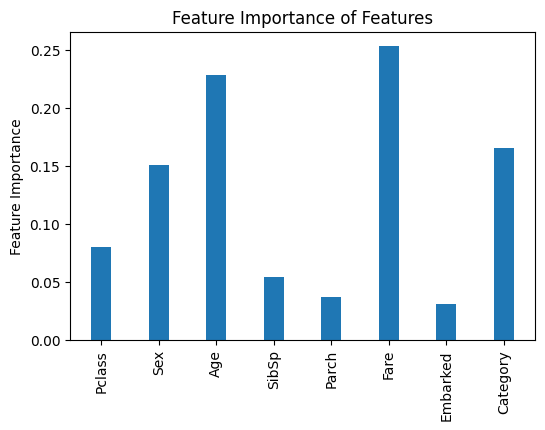

In [137]:
bar_width = 0.35
x = np.arange(len(col))
plt.figure(figsize=(6,4))
plt.bar(x, importances, bar_width)
plt.xticks(x, col, rotation=90)
plt.ylabel("Feature Importance")
plt.title("Feature Importance of Features")
plt.show()